In [38]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy
from math import comb, e

11.1 Heitetään kolikkoa 5 kertaa, jokaisella kerralla sekä kruunan että klaavan todennäköisyys on 0,5. Muodosta binomijakauma kruunien lukumäärälle (klaavojen lukumäärä olisi symmetrinen).

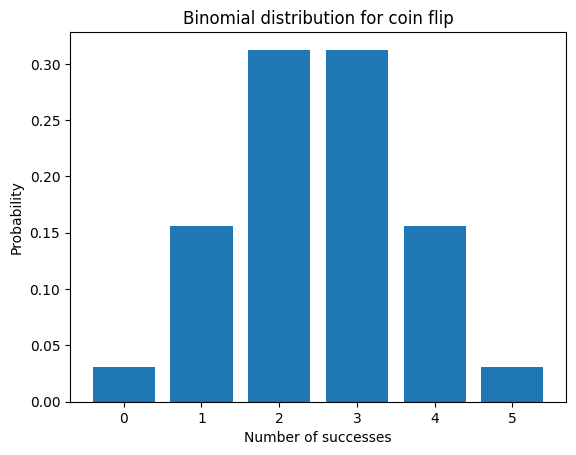

In [39]:
## Code here
n = 5
p = 0.5
q = 1 - p

# Now doing this manually for the sake of learning
b0 = comb(n, 0) * p**0 * q**(n-0)
b1 = comb(n, 1) * p**1 * q**(n-1)
b2 = comb(n, 2) * p**2 * q**(n-2)
b3 = comb(n, 3) * p**3 * q**(n-3)
b4 = comb(n, 4) * p**4 * q**(n-4)
b5 = comb(n, 5) * p**5 * q**(n-5)

# Lets plot the binomial distribution
x = [0, 1, 2, 3, 4, 5]
y = [b0, b1, b2, b3, b4, b5]

plt.bar(x, y)
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Binomial distribution for coin flip')
plt.show()


11.2 Mikä on edellisen tehtävän binomijakauman odotusarvo ja keskihajonta? Mikä on todennäköisin arvo? Mikä on todennäköisyys, että tulee vähintään kolme kruunaa?

In [40]:
## Code here

# Excpected value n*p
excepted_coin_toss = n*p
print("Expected succecion: ",excepted_coin_toss)

# Standard deviation sqrt(n*p*q)
std_coin_toss = numpy.sqrt(n*p*q)
print("Standard deviation of coin toss: ", std_coin_toss)

prob_of_atleast_3_heads = b3 + b4 + b5
print("Probability of getting atleast 3 heads: ", prob_of_atleast_3_heads)

Expected succecion:  2.5
Standard deviation of coin toss:  1.118033988749895
Probability of getting atleast 3 heads:  0.5


11.3 Kymmentä noppaa heitetään, millä todennäköisyydellä tulee vähintään kaksi kuutosta?

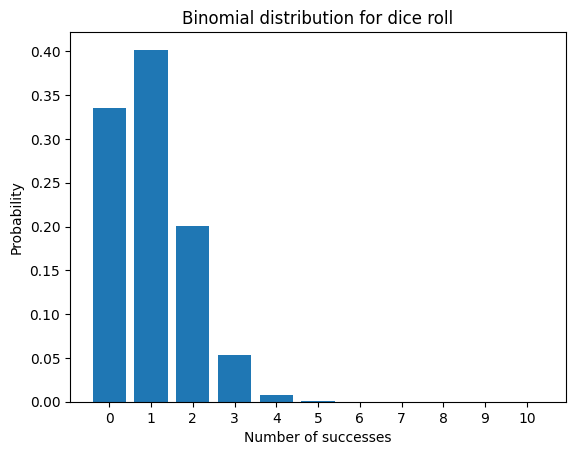

Probability of getting atleast 2 sixes:  0.263224451303155


In [41]:
## Code here
n = 6
p = 1/6
q = 1 - p

# going to calculate with loop of 10 times
b = []
for i in range(0, 11):
    b.append(comb(n, i) * p**i * q**(n-i))

# Lets plot the binomial distribution
x = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
y = b

plt.bar(x, y)
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Binomial distribution for dice roll')
plt.show()

# Probability of getting atleast 2 sixes
prob_of_min_2_sixes = b[2] + b[3] + b[4] + b[5] + b[6] + b[7] + b[8] + b[9] + b[10]

print("Probability of getting atleast 2 sixes: ", prob_of_min_2_sixes)



11.4 Opiskelija myöhästyy luennolta todennäköisyydellä 0,15. Kuinka monta kertaa hän myöhästyy 200 luennolta keskimäärin? Millä todennäköisyydellä hän myöhästyy tasan odotusarvon määrältä luentoja?

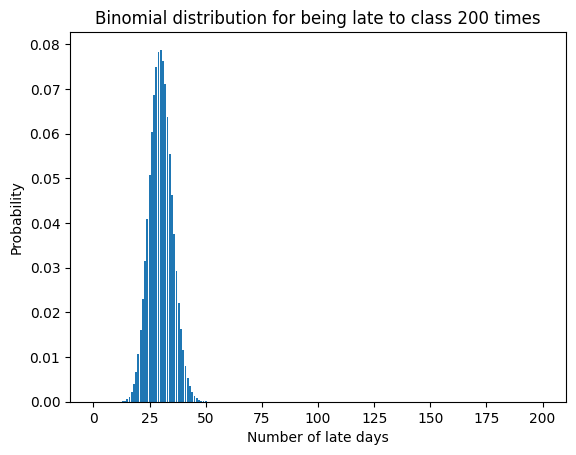

Expected late days:  30.0
Probability of expected late days:  7.88 %
Average late times:  30


In [42]:
## Code here
n = 200
p = 0.15
q = 1 - p

# lets create a list of binomial distribution
b = []
for i in range(0, 201):
    b.append(comb(n, i) * p**i * q**(n-i))

# Lets plot the binomial distribution
x = list(range(0, 201))
y = b

plt.bar(x, y)
plt.xlabel('Number of late days')
plt.ylabel('Probability')
plt.title('Binomial distribution for being late to class 200 times')
plt.show()

# lets make the x and y into a dict to make it easier to work with
b_dict = dict(zip(x, y))

# Expected value
expected_late_days = n*p
print("Expected late days: ", expected_late_days)
expected_late_days_prob = round(b_dict[expected_late_days] * 100, 2)
print("Probability of expected late days: ", expected_late_days_prob, "%")
average_late_times = max(b_dict, key=b_dict.get)
print("Average late times: ", average_late_times)

11.5 Onnettomuuksien määrä Turussa yhden päivän aikana on diskreetti satunnaismuuttuja 𝑋 ja se noudattaa Poisson-jakaumaa parametrilla 𝜆=3,9, eli 𝑋~𝑃𝑜(3,9). Laske tämän jakauman 10 ensimmäisen arvon todennäköisyydet. Mikä on todennäköisin onnettomuuksien lukumäärä päivässä? Mikä on todennäköisyys, että onnettomuuksia tapahtuu enintään 4.

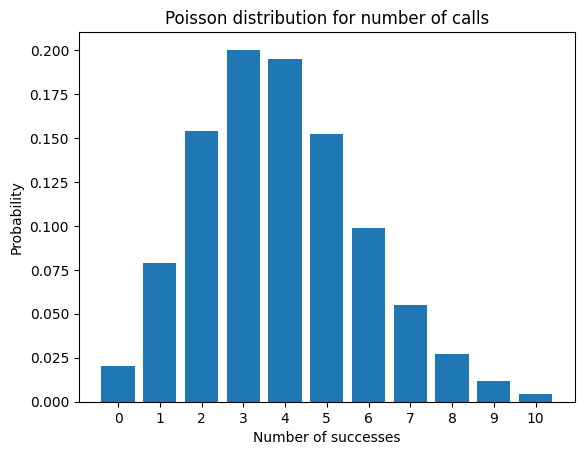

We can see thet probability of 3 accidents is the highest
Probability of maximum of 4 accidents:  64.84 %


In [47]:
## Code here
𝜆 = 3.9

poisson_probs = []
for i in range(0, 11):
    poisson_probs.append((e**(-𝜆) * 𝜆**i) / scipy.special.factorial(i))

# Lets plot the binomial distribution
x = list(range(0, 11))
for item in x:
    x[item] = str(x[item])
y = poisson_probs

plt.bar(x, y)
plt.xlabel('Number of accidents')
plt.ylabel('Probability')
plt.title('Poisson distribution for number of accidents')
plt.show()

print("We can see thet probability of 3 accidents is the highest")

# Calculate probr of maximum of 4
prob_of_max_4 = poisson_probs[0] + poisson_probs[1] + poisson_probs[2] + poisson_probs[3] + poisson_probs[4]
print("Probability of maximum of 4 accidents: ", round(prob_of_max_4 * 100, 2), "%")

11.6 Matematiikan kurssista hylätyn saaneita opiskelijoita on keskimäärin 5,7 yhtä kurssia kohden ja heidän lukumääränsä noudattaa Poisson-jakaumaa. Laske tämän jakauman 10 ensimmäisen arvon todennäköisyydet. Mikä on jakauman keskihajonta? Laske myös 𝑃(𝑋≥2).

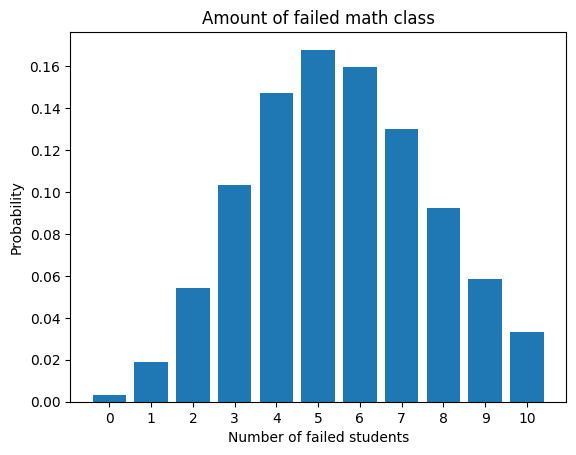

Probability of 2 or more failed students:  94.61 %


In [53]:
## Code here
𝜆 = 5.7

poisson_probs = []
for i in range(0, 11):
    poisson_probs.append((e**(-𝜆) * 𝜆**i) / scipy.special.factorial(i))

# Lets plot the binomial distribution
x = list(range(0, 11))
for item in x:
    x[item] = str(x[item])
y = poisson_probs

plt.bar(x, y)
plt.xlabel('Number of failed students')
plt.ylabel('Probability')
plt.title('Amount of failed math class')
plt.show()

# Lets calculate standard deviation
std = numpy.sqrt(𝜆)

# Lets calculate probability of 2 or more
prob_of_2_or_more = poisson_probs[2] + poisson_probs[3] + poisson_probs[4] + poisson_probs[5] + poisson_probs[6] + poisson_probs[7] + poisson_probs[8] + poisson_probs[9] + poisson_probs[10]
print("Probability of 2 or more failed students: ", round(prob_of_2_or_more * 100, 2), "%")